# CNN Basics

## 🔹 1. What Is a Convolutional Neural Network (CNN)?

A **CNN** (Convolutional Neural Network) is a class of deep learning models optimized to process grid-like data—particularly images—by automatically learning spatial hierarchies of features. They draw inspiration from the biological visual cortex, effectively capturing patterns like edges, textures, and complex shapes through layered processing.

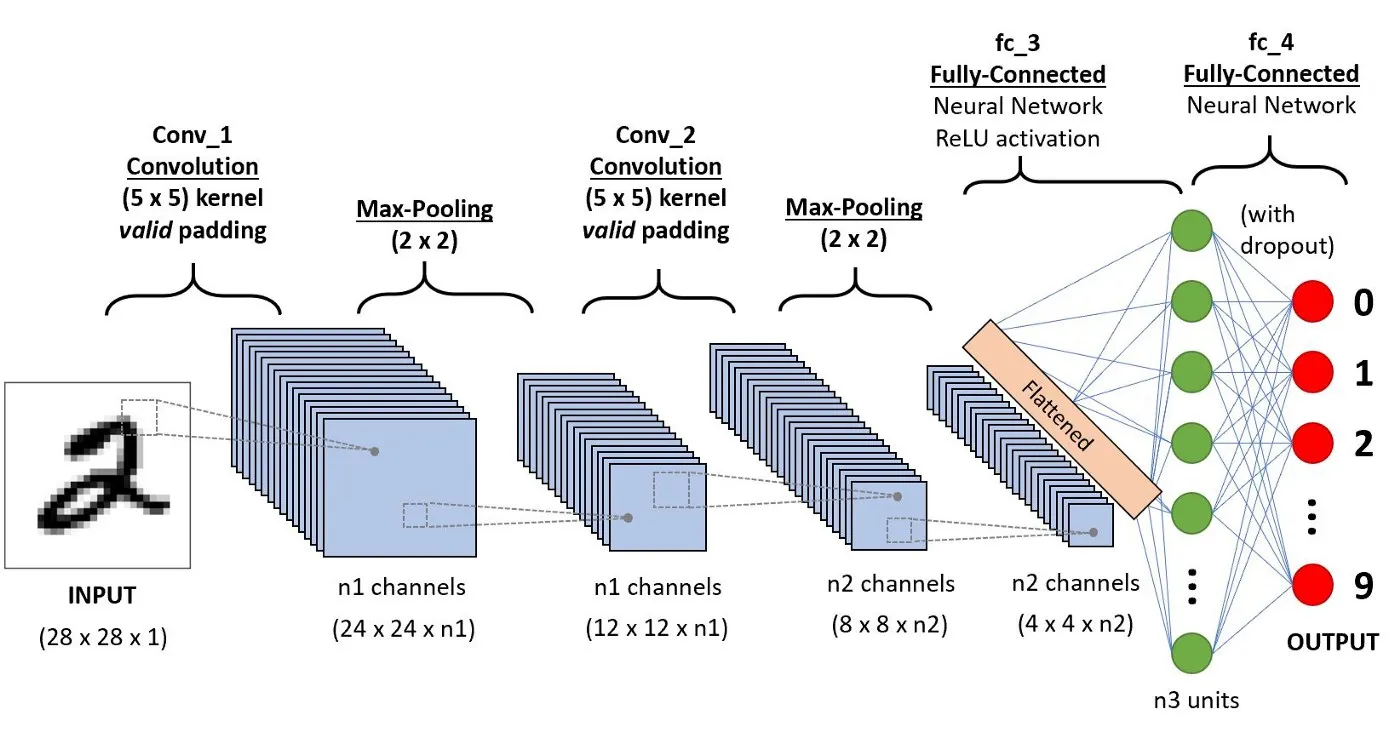

## 🔹 2. Layers in a Convolutional Neural Network

CNNs are composed of different types of layers stacked in sequence. Each layer transforms the input data into progressively more abstract and meaningful representations.

---

## 1. **Input Layer**

- **Purpose**: Accepts raw data (usually images).
- **Format**: Images are represented as a 3D matrix:
  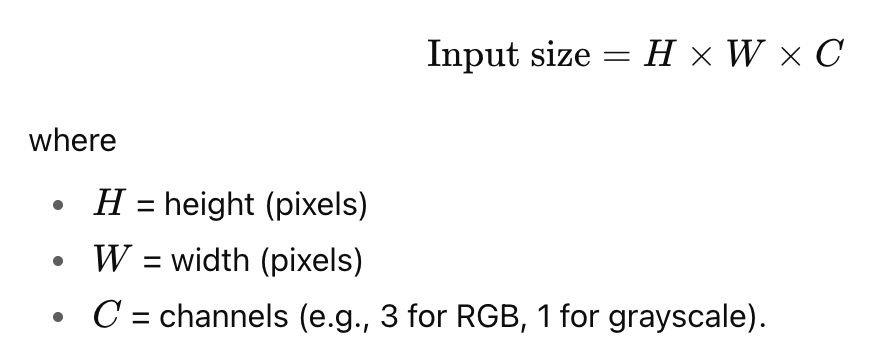

✅ Example: A 64×64 RGB image → 64×64×3.

---

## 2. **Convolutional Layer**

This is the **core building block** of CNNs.

### a) **How it works**

- A **kernel (filter)** of size k×k×C slides over the input image.
- At each position, the **dot product** between the filter and input patch is computed.
- The result is one **feature map** (also called activation map).

### b) **Mathematical operation**

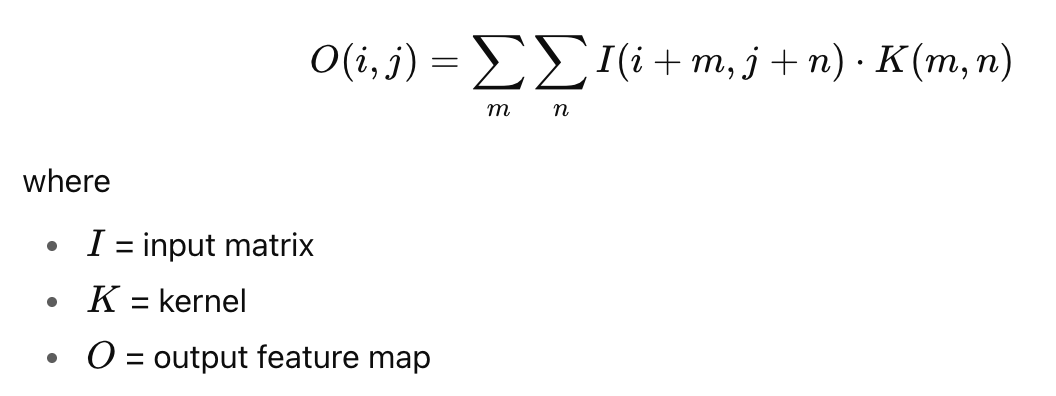

### c) **Hyperparameters in CNN**

Hyperparameters are values set **before training** that determine the architecture and behavior of a CNN. They are not learned but directly influence model accuracy, training speed, and generalization.

---

### **a) Kernel (Filter/Feature Detectors) Size**

- Defines the dimension of the convolution filter.
- Common: **3×3**, **5×5**, **7×7**.
- Smaller kernels (3×3):
    - Capture fine details (edges, textures).
    - Can be stacked to approximate larger receptive fields.
    - Used in **VGGNet**.
- Larger kernels (7×7, 11×11):
    - Capture more global context early on.
    - Used in early **AlexNet** layers.

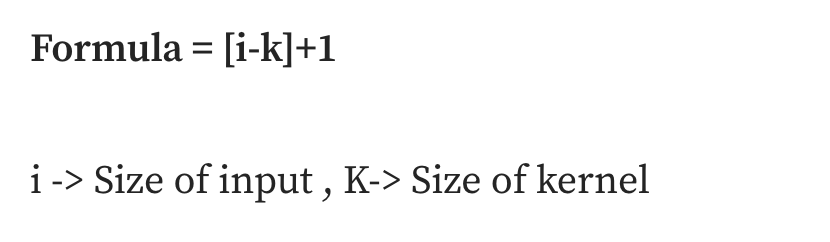
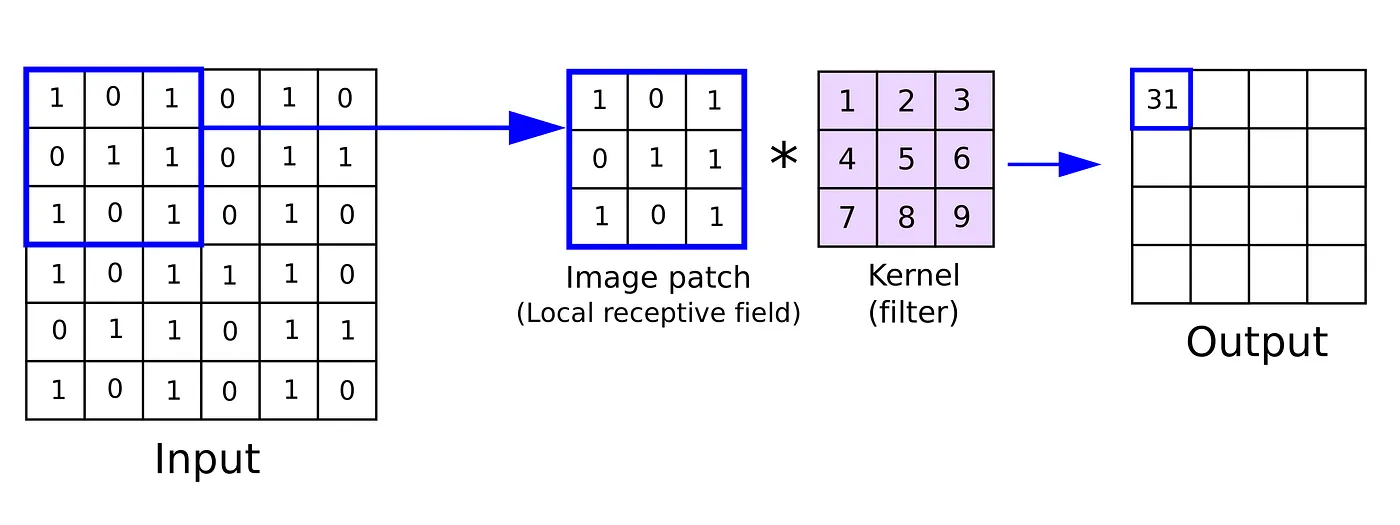

---

### **b) Number of Filters**

- Determines how many feature maps are produced at each layer.
- More filters = ability to capture more features, but more computation.
- Example progression in CNNs:
    - Shallow layers: 32–64 filters (edges, corners).
    - Deep layers: 128–1024 filters (complex shapes, objects).

---

### **c) Stride (S)**

- Number of steps the kernel moves across the input. (How many pixels the filter moves per step. Larger stride → smaller output.)
- **Stride = 1** → detailed feature maps, larger output.
- **Stride = 2 or more** → smaller output, less computation.

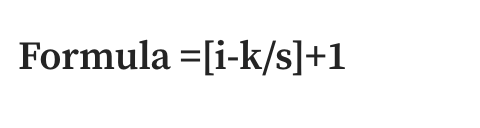 
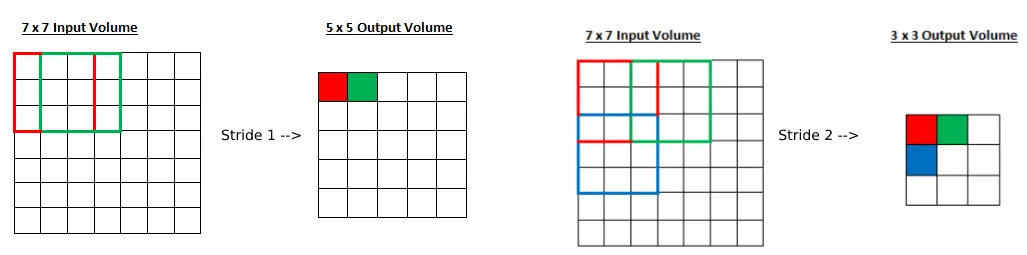
---

### **d) Padding (P)**

- Adds zeros (or reflections) around the input.(Adding zeros around input to preserve size or avoid information loss.)
- **Valid convolution**: No padding → shrinks output.
- **Same convolution**: Padding ensures output size = input size.
- Example:
    - Input: 32×32, Kernel: 3×3, Stride 1
    - With padding = 1 → Output stays 32×32.

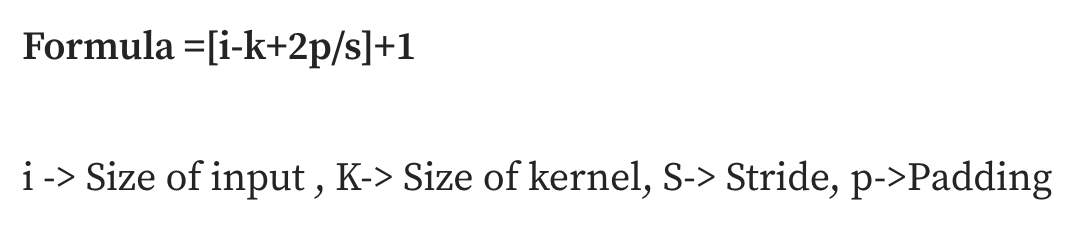
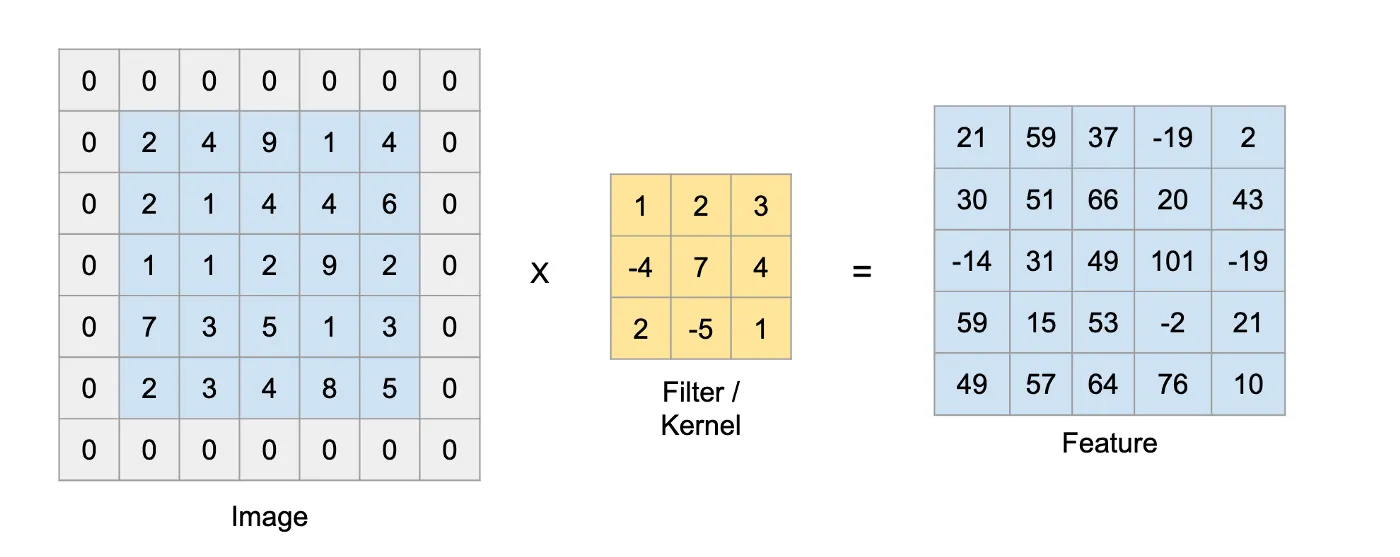

---

### **e) Pooling Size**

- Determines region size (2×2, 3×3).
- Larger pooling = more aggressive downsampling.

---

### **f) Learning Rate (η)**

- Step size during weight updates.
- Too high → unstable, diverges.
- Too low → slow convergence.
- Often scheduled (e.g., step decay, cosine annealing).

---

### **g) Batch Size**

- Number of samples processed before weight updates.
- Large batch → stable gradients, but high memory usage.
- Small batch → noisier updates, may generalize better.

---

### **h) Depth of Network**

- Number of convolutional + pooling layers stacked.
- Deeper networks → capture more complex features, but risk vanishing gradients (mitigated by residual connections).

---

✅ **Tuning hyperparameters** is critical. For example, ImageNet-scale CNNs (ResNet, VGG) often start with 3×3 kernels, padding=1, stride=1, pooling=2×2, with gradually increasing filters.

### d) **Output size formula**

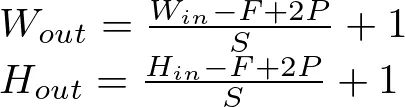

where:

- *W_out* and *H_out* are the width and height of the output feature map, respectively.
- *W_in* and *H_in* are the width and height of the input, respectively.
- *F* is the size of the filter.
- *S* is the stride.
- *P* is the padding.

✅ Example: Input 32×32, Kernel 5×5, Stride 1, Padding 0 → Output = 28×28.

### e) **Purpose**

- Extracts **local features** (edges, corners, textures).
- Early layers detect low-level features, deeper layers capture complex patterns (faces, objects).

---

## 3. **Activation Layer**

- **Purpose**: Introduces **non-linearity** (real-world data is non-linear).
- Without it, CNN = linear filter = not powerful enough.

### Common activation functions:

- **ReLU (Rectified Linear Unit):**
  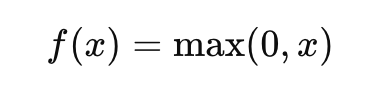

- Keeps positive values, sets negatives to 0.

- **Advantages**:
    - Simple, fast, efficient.
    - Solves vanishing gradient problem of Sigmoid/Tanh.
- **Limitations**:
    - **Dying ReLU problem**: Neurons stuck at 0 (if weights make all inputs negative).

✅ Example: Used in almost all CNNs (VGG, ResNet, AlexNet).

---

- **Leaky ReLU**

- Modification of ReLU to fix dying neurons.

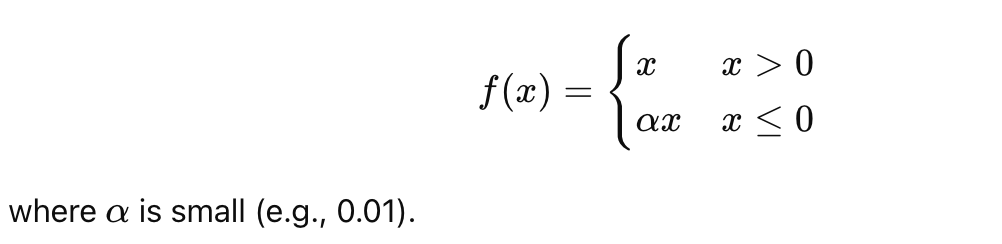

- **Advantages**:
    - Keeps small negative values, avoids dead neurons.
    - Better gradient flow.
- **Variants**: Parametric ReLU (PReLU) where α\alphaα is learned.

✅ Example: Sometimes used in GANs and deep CNNs.
- **Sigmoid**: Squashes values between (0,1). Useful in binary classification.
- **Tanh**: Squashes values between (-1,1).

✅ Most CNNs use **ReLU** after each convolution.

---

### **GELU (Gaussian Error Linear Unit)**

- Smooth, probabilistic version of ReLU.

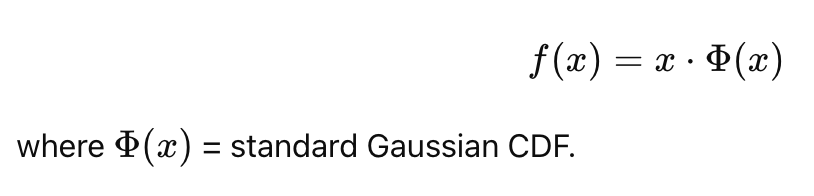

Approximation:

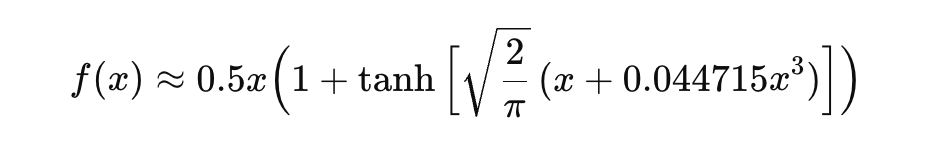

- **Advantages**:
    - Combines ReLU’s sparsity with smoothness.
    - Performs better in very deep models (used in **BERT, Vision Transformers**).
- **Intuition**: Instead of hard cutoff (ReLU), GELU “softly” scales negative inputs.

✅ Example: Modern networks (transformer-based CNN hybrids, NLP models).

---

### 🔹 Comparison of Activation Functions

| Function | Formula | Pros | Cons | Use cases |
| --- | --- | --- | --- | --- |
| **ReLU** | 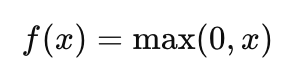 | Fast, effective, avoids vanishing gradients | Dying ReLU problem | CNN classics (VGG, ResNet, AlexNet) |
| **Leaky ReLU** | 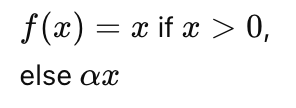 | Fixes dead neurons | Slightly slower, extra parameter | GANs, deep CNNs |
| **GELU** | 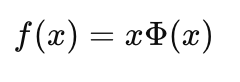 | Smooth, probabilistic, strong performance | Costlier than ReLU | Transformers, advanced CNNs |

---

## 4. **Pooling (Subsampling / Downsampling) Layer**

- **Purpose**: Reduces spatial size of feature maps while retaining important information.
    - Makes CNN **faster** (fewer computations).
    - Provides **translation invariance** (feature detected anywhere).

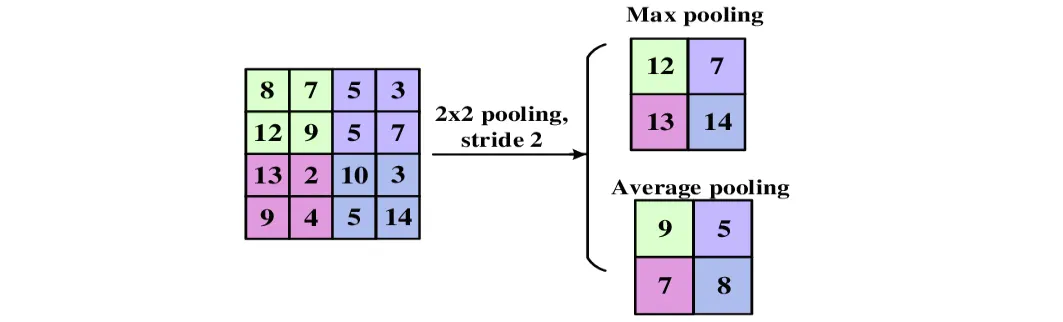

### **a) Why Pooling?**

- Reduces **computational cost**.
- Prevents **overfitting** by summarizing.
- Provides **translation invariance** (object detected regardless of exact location).

---

### **b) Types of Pooling**

### 1. **Max Pooling**

- Takes maximum value in the region.
- Preserves strong/important features (like edges).

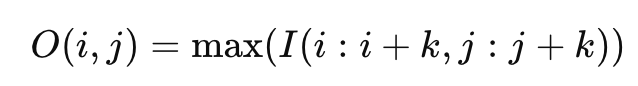

Example: For a 2×2 window:

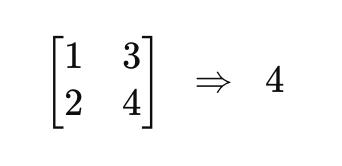

---

### 2. **Average Pooling**

- Takes the average of values.
- Smooths representation, but may lose sharp features.
  
Example:

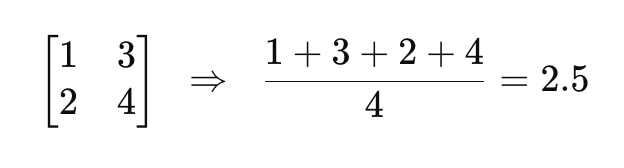

---

### 3. **Global Average Pooling (GAP)**

- Instead of flattening before fully connected layers, GAP averages the entire feature map.
- Used in **modern CNNs (Inception, ResNet)** to reduce parameters.

If feature map = H×W, GAP reduces it to 1×1.

---

### 4. **Global Max Pooling**

- Similar to GAP, but takes the maximum.

---

### **c) Pooling Window & Stride**

- Typical pooling: **2×2 with stride 2** → halves dimensions.
- Example: Input = 32×32, after pooling = 16×16.

---

### **d) Problems with Pooling**

- Too much pooling → loss of spatial information.
- Modern alternatives: **strided convolutions** (learnable downsampling) and **dilated convolutions** (increase receptive field without pooling).    

---

## 5. **Normalization Layers**

- **Purpose**: Improves training stability, convergence, and generalization.

### Types:

1. **Batch Normalization (BN)**: Normalizes input across a batch.
   
   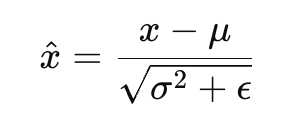
    
    - Keeps activations in a stable range.
    - Allows higher learning rates.
3. **Layer Normalization / Group Normalization**: Variants used in some architectures.

✅ Example: Used in VGG, ResNet, Inception.

---

## 6. **Dropout Layer**

- **Purpose**: Prevents **overfitting**.
- During training, randomly drops (sets to zero) a fraction ppp of neurons.

    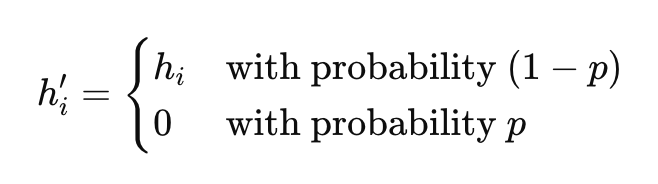

✅ Example: Dropout rate = 0.5 → 50% neurons dropped per iteration.

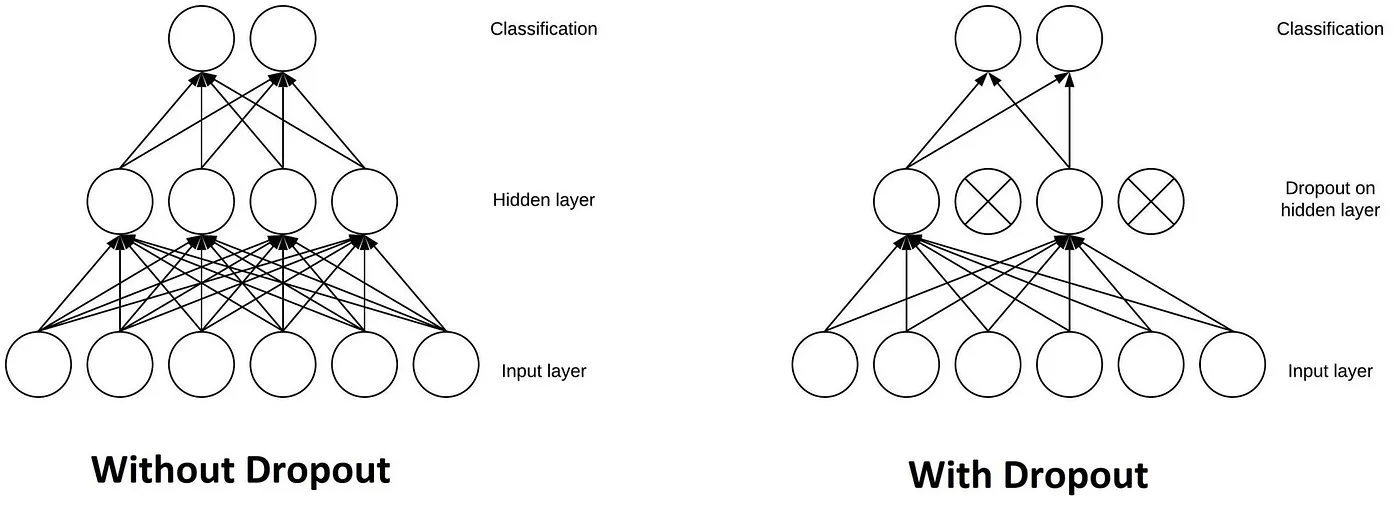

---

## 7. **Fully Connected (Dense) Layer**

- **Purpose**: Final decision-making layer.
- Flattens feature maps → vector → passes through dense layers.
- Performs classification or regression.

### Math:

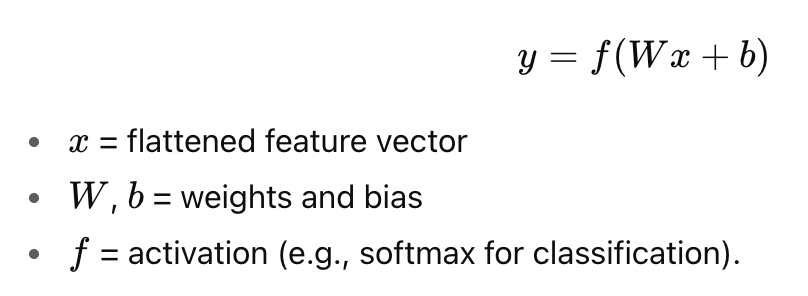 

✅ Example: For ImageNet (1000 classes), final FC layer has 1000 neurons.

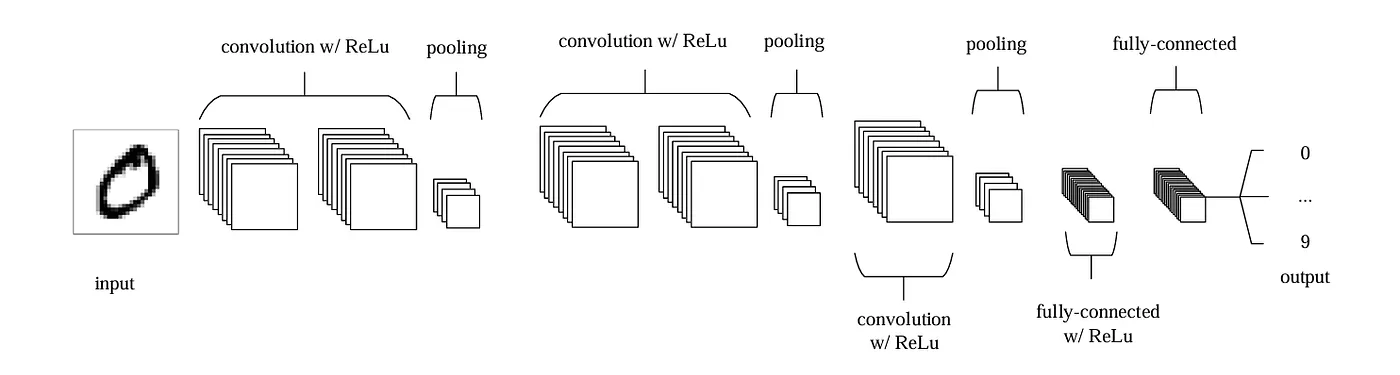

---

## 8. **Output Layer**

- **Purpose**: Produces final predictions.
- **Activation depends on task**:
    - **Softmax**: Multiclass classification.
 
      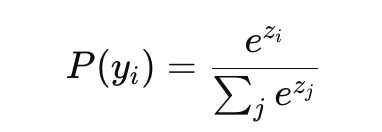
        
    - **Sigmoid**: Binary classification.
    - **Linear**: Regression.

✅ Example: In digit recognition (0–9), output layer has 10 neurons with softmax.

---

# 🔹 Summary Table of CNN Layers

| Layer | Purpose | Operation / Math |
| --- | --- | --- |
| **Input** | Holds raw data | 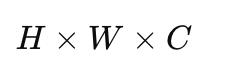 |
| **Convolution** | Extracts local features | Convolution with filters |
| **Activation (ReLU)** | Adds non-linearity | 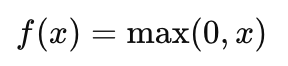|
| **Pooling** | Reduces size, keeps strong features | Max / Average pooling |
| **Normalization (BN)** | Stabilizes training | 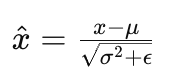 |
| **Dropout** | Prevents overfitting | Randomly drops neurons |
| **Fully Connected** | Combines features | 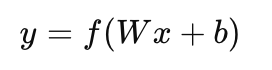|
| **Output** | Final predictions | Softmax / Sigmoid / Linear |

---

👉 So, a **standard CNN pipeline** looks like this:

**Input → Conv → ReLU → Pooling → Conv → ReLU → Pooling → Flatten → Fully Connected → Dropout → Output**

## 3. How CNNs Learn Features: Hierarchical Feature Extraction

CNNs excel because they **automatically learn hierarchical representations**:

- Early layers respond to simple features (like edges and textures).
- Intermediate layers detect more complex patterns (shapes, parts).
- Final layers capture high-level concepts (objects).

This layered progression makes CNNs **parameter-efficient**, computationally effective (thanks to parallelizable convolution operations), and highly transferable to tasks across computer vision and beyond (like audio or time-series analysis).

---

## 5. Modern Architectural Patterns & Training Enhancements

As CNNs deepened, new design principles and techniques emerged:

- **Stem, Body, Head** patterns: Dividing models into initial processing (stem), main convolutional blocks (body), and classification head.
- **Batch Normalization (BatchNorm)**: Helps accelerate training convergence and enables training with hundreds of layers.
- **Residual Connections (ResNet)**: Mitigate vanishing gradients and allow deeper architectures—though specifics weren't provided in your links.

---

## 6. Why CNNs Matter—Advantages and Applications

CNNs revolutionized image-related AI due to multiple strengths:

- **Reduced parameters vs. fully connected networks**, thanks to local connectivity and weight sharing.
- **Spatial invariance**, especially through pooling, enabling robustness to translation and scale.
- **Transferability and computational efficiency**, which allowed them to become foundation models for tasks like segmentation, tracking, and beyond.

As such, CNNs are widely used in image classification, object detection, medical imaging, video analysis, and even domains like audio and text with grid-structured input.

---

## 7. Putting It All Together: A Typical CNN Workflow

1. **Design the architecture**
    - Determine input format (e.g., 32×32×3).
    - Choose convolutional blocks: filters, kernel size, stride, padding.
    - Insert activations and pooling.
    - Add one or more fully connected layers before output.
2. **Initialize**
    - Randomly set weights; use techniques like batch normalization for stability.
3. **Train**
    - Use backpropagation to update parameters via a labeled dataset.
4. **Inference**
    - Feed forward input images to get predictions (e.g., class labels).

---

### Summary Table

| Component | Purpose |
| --- | --- |
| Input Layer | Receives raw pixel or grid-data (height × width × channels) |
| Convolutional Layer | Applies learnable filters to extract local features |
| Stride & Padding | Control movement and output dimensions during convolution |
| Activation Function | Adds non-linearity (e.g., ReLU) |
| Pooling Layer | Downsamples feature maps, reducing computation and overfitting |
| Fully Connected Layers | Integrate features for classification/regression |
| Specialized Architectures | LeNet-5, AlexNet, VGG-16, GoogLeNet (Inception) |
| Enhancements | BatchNorm, residual connections, modular design |
| Benefits | Efficient, invariant feature extraction; widely transferable |

# 📌 Why CNNs for Images (Local Patterns & Spatial Hierarchies)

### 1. **Motivation**

- Images contain **structured information** and **hierarchical organization** : nearby pixels form local features, and these features combine into more complex structures.
- CNNs are designed to exploit this by using **convolution, weight sharing, and layer stacking**, unlike fully connected networks which ignore spatial relationships.

---

### 2. **Local Patterns**

- **Definition**: Small regions of an image (e.g., 3×3 or 5×5 pixel patches) that capture fundamental visual cues.
- **Examples**: Edges, corners, blobs, textures.
- **How CNNs capture them**:
    - Convolution filters learn to detect these small-scale patterns by scanning over small patches (receptive fields).
    - The same filter slides over the entire image (weight sharing), enabling efficient detection across locations.
    - Weight sharing makes filters reusable across the whole image, ensuring efficient learning and translation equivariance (the same feature can be recognized anywhere).
    - This ensures **translation equivariance** → the same feature is recognized anywhere in the image.

---

### 3. **Spatial Hierarchies (Stacking Layers)**

CNNs progressively build a hierarchy of representations by **stacking convolutional layers**:

- **Early layers** → detect very simple features like **edges, corners, and color blobs**.
- **Middle layers** → combine these to form **parts, textures, and motifs** (e.g., wheels, eyes, fur patterns).
- **Deeper layers** → integrate parts into **complete objects** or even capture **scene-level context**.
- Pooling/striding layers help abstract features further, making them less sensitive to exact position while retaining meaning.
- Stacking convolutional layers increases the receptive field gradually, allowing deeper layers to capture global context while early layers capture fine details

---

### 4. **Why This Matters**

- **Parameter efficiency**: Local connections & shared weights reduce complexity compared to dense networks.
- **Better generalization**: Hierarchical features mirror how real-world objects are structured.
- **Robustness**: Spatial hierarchies + pooling give resilience to translations, distortions, and small noise.
- **Biological similarity**: Mimics the human visual cortex, where neurons detect edges in early stages and full objects in higher stages.

---

### 5. **Why CNNs Are Effective**

- **Efficiency**: Local connectivity and weight sharing drastically reduce parameters compared to fully connected nets.
- **Generalization**: Capturing local-to-global hierarchies improves recognition of complex objects.
- **Translation robustness**: Features can be detected regardless of where they appear in the image.
- **Biological inspiration**: Similar to how the human visual cortex processes information — from simple cells (edges) to complex cells (objects).

---

✅ **Summary**:

CNNs excel at image tasks because they **first detect local patterns** (edges, textures) and then, by **stacking layers**, build **spatial hierarchies** that represent objects and scenes. This makes them efficient, robust, and biologically inspired models for vision.

---

# **Practice**:

## 🧩 CNN from Scratch (NumPy) – MNIST Classification
### 1. Imports and Data

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add channel dimension (28x28 -> 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### **1. Loading the Dataset**

The MNIST dataset is a collection of 70,000 handwritten digits (0–9). The code splits it into:

- **Training set** (`x_train`, `y_train`) – used to train the model.
- **Test set** (`x_test`, `y_test`) – used to evaluate the model.

Each image is 28×28 pixels, and labels are integers from 0 to 9.

---

### **2. Normalizing Pixel Values**

Original pixel values range from 0 to 255. Dividing by 255 scales them to a **0–1 range**, which helps the neural network **train faster and more stably**.

---

### **3. Reshaping for CNN Input**

Convolutional neural networks expect images with a **channel dimension**. Even though MNIST images are grayscale:

- A single image shape changes from `(28,28)` → `(28,28,1)`
- The `1` indicates **1 color channel** (grayscale).

This allows the CNN to process the image correctly.

---

### **4. One-Hot Encoding Labels**

Neural networks for classification require labels as **vectors** rather than integers. One-hot encoding converts each label:

- Example: `7` → `[0,0,0,0,0,0,0,1,0,0]`
- The vector length equals the number of classes (10 digits).

This format works with the **softmax activation** in the output layer to calculate probabilities for each class.

---

### 2. Activation Functions

In [171]:
# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Softmax activation
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / np.sum(exp_x)

**ReLU:**

- Keeps positive values, sets negatives to 0.
- Adds non-linearity so the network can learn complex patterns.

**Softmax:**

- Converts outputs into probabilities that sum to 1.
- Used in the output layer for multi-class classification.

---

### 3. Convolution Layer (Forward Only)

In [174]:
def conv2d(input, kernel, stride=1, padding=0):
    # Pad input
    input_padded = np.pad(input, [(padding,padding),(padding,padding)], mode='constant')
    kernel_h, kernel_w = kernel.shape
    h_out = (input_padded.shape[0] - kernel_h) // stride + 1
    w_out = (input_padded.shape[1] - kernel_w) // stride + 1
    output = np.zeros((h_out, w_out))
    
    # Convolution operation
    for i in range(0, h_out*stride, stride):
        for j in range(0, w_out*stride, stride):
            output[i//stride, j//stride] = np.sum(
                input_padded[i:i+kernel_h, j:j+kernel_w] * kernel
            )
    return output

### **Convolution (`conv2d`)**

- Performs a **2D convolution** between an input image and a kernel (filter).
- **Steps:**
    1. **Padding:** Adds zeros around the image edges if needed.
    2. **Compute output size:** Determines height and width of the resulting feature map.
    3. **Sliding window:** Moves the kernel across the image using the given stride.
    4. **Element-wise multiplication and sum:** For each region, multiplies kernel values with image pixels and sums them to get a single number in the output.
- **Purpose:** Extracts **features** like edges, corners, and textures from the image.
- **Example:**
    - Input: 5×5 image, 3×3 kernel → Output: 3×3 feature map (if stride=1, no padding)

---

### 4. Max Pooling

In [176]:
def max_pool2d(input, pool_size=2, stride=2):
    h_out = (input.shape[0] - pool_size) // stride + 1
    w_out = (input.shape[1] - pool_size) // stride + 1
    output = np.zeros((h_out, w_out))
    
    # Max pooling operation
    for i in range(0, h_out*stride, stride):
        for j in range(0, w_out*stride, stride):
            output[i//stride, j//stride] = np.max(
                input[i:i+pool_size, j:j+pool_size]
            )
    return output

### **Max Pooling (`max_pool2d`)**

- **Purpose:** Reduces the size of the feature map while keeping the most important information.
- **Steps:**
    1. **Sliding window:** Moves a `pool_size × pool_size` window over the input feature map using the given stride.
    2. **Select maximum:** For each window, takes the **maximum value** and puts it in the output.
    3. **Output:** Smaller feature map that retains key features and reduces computation.
- **Example:**
    - Input: 4×4 feature map, pool_size=2, stride=2 → Output: 2×2 pooled map

✅ **Key Idea:** Max pooling **keeps the strongest signals** and reduces spatial dimensions, making the CNN more efficient and robust to small shifts.

---

### 5. Simple CNN Class

In [179]:
class SimpleCNN:
    def __init__(self):
        # Initialize convolution kernel
        self.conv1_kernel = np.random.randn(3,3)
        # Fully connected layer weights (after 13x13 pooling)
        self.fc_weights = np.random.randn(13*13, 10)
        self.fc_bias = np.zeros(10)

    def forward(self, x):
        # Convolution + ReLU
        x = relu(conv2d(x[:, :, 0], self.conv1_kernel))
        # Max Pooling
        x = max_pool2d(x)
        # Flatten
        x = x.flatten()
        # Fully connected layer + Softmax
        x = np.dot(x, self.fc_weights) + self.fc_bias
        return softmax(x)

### **SimpleCNN Class**

- Represents a **very basic CNN** with:
    1. **One convolution layer** with a 3×3 kernel.
    2. **One max pooling layer** to reduce spatial dimensions.
    3. **One fully connected layer** that outputs 10 values (for digits 0–9).

---

### **Initialization (`__init__`)**

- **Convolution kernel:** Random 3×3 filter for feature extraction.
- **Dense weights and bias:** Random weights for fully connected layer after flattening the pooled feature map.

---

### **Forward Pass (`forward`)**

1. **Convolution + ReLU:** Extracts features from the input image and applies non-linearity.
2. **Max Pooling:** Reduces feature map size, keeping the most important features.
3. **Flatten:** Converts 2D feature map into a 1D vector for the dense layer.
4. **Fully Connected + Softmax:** Produces probabilities for each digit class (0–9).

---

✅ **Key Idea:**

This class shows the **core mechanics of a CNN** in a simple, understandable way: convolution → pooling → flatten → dense → softmax.

---

### 6. Forward Pass on a Sample Image

In [185]:
# Create CNN instance
cnn = SimpleCNN()

# Take a single image from training set
sample_image = x_train[0]

# Forward pass
output = cnn.forward(sample_image)

# Print output probabilities and predicted class
print("Predicted probabilities:", output)
print("Predicted class:", np.argmax(output))

Predicted probabilities: [5.14419339e-10 5.06487679e-12 4.62703388e-04 3.39506505e-03
 7.39046024e-12 4.36277163e-11 9.96138078e-01 4.04628694e-10
 4.15252791e-06 1.99470380e-12]
Predicted class: 6


### **1. Create CNN Instance**

- `cnn = SimpleCNN()`
    - Initializes the CNN with random convolution and dense weights.
    - Prepares it to process images through the forward pass.

---

### **2. Select a Sample Image**

- `sample_image = x_train[0]`
    - Chooses the first image from the training set to test the network.

---

### **3. Forward Pass**

- `output = cnn.forward(sample_image)`
    - Passes the image through the CNN:
        1. Convolution + ReLU
        2. Max pooling
        3. Flattening
        4. Dense layer + Softmax
    - Produces a **probability vector** for each class (digits 0–9).

---

### **4. Print Predictions**

- `print("Predicted probabilities:", output)`
    - Shows the network’s confidence for each digit.
- `print("Predicted class:", np.argmax(output))`
    - Shows the **digit with the highest probability**, i.e., the network’s predicted label.

---

✅ **Key Idea:**

This section demonstrates how to **test the CNN on a single image** and interpret its output probabilities and predicted class.

---

## 🧩 CNN for MNIST – TensorFlow Version
### 1. Imports & Data

In [126]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Add channel dimension (28x28 → 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### **1. Imports**

- `tensorflow` → for building and training neural networks.
- `mnist` → dataset of handwritten digits.
- `to_categorical` → converts labels to one-hot encoding.

---

### **2. Load Dataset**

- `(X_train, y_train), (X_test, y_test) = mnist.load_data()`
    - Loads MNIST dataset into training and test sets.

---

### **3. Normalize Pixel Values**

- `X_train, X_test = X_train / 255.0, X_test / 255.0`
    - Converts pixel values from 0–255 → 0–1 for faster and more stable training.

---

### **4. Add Channel Dimension**

- `X_train = X_train.reshape(-1, 28, 28, 1)`
- `X_test = X_test.reshape(-1, 28, 28, 1)`
    - CNNs require a channel dimension; 1 indicates grayscale images.

---

### **5. One-Hot Encode Labels**

- `y_train = to_categorical(y_train, 10)`
- `y_test = to_categorical(y_test, 10)`
    - Converts integer labels (0–9) into **vectors** for classification with softmax.
    - Example: `7` → `[0,0,0,0,0,0,0,1,0,0]`

---

✅ **Key Idea:**

This prepares MNIST for a TensorFlow CNN by **normalizing images, reshaping for convolution, and converting labels to one-hot vectors**.

---

### 2. Define CNN Model

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

### **1. Sequential Model**

- `Sequential([...])` defines a **linear stack of layers** for the CNN.

---

### **2. Layers**

1. **Conv2D**
    - `filters=8` → 8 feature maps will be created.
    - `kernel_size=(3,3)` → 3×3 convolutional kernels.
    - `activation='relu'` → applies ReLU after convolution.
    - `input_shape=(28,28,1)` → input image size (grayscale).
2. **MaxPooling2D**
    - `pool_size=(2,2)` → downsamples feature maps by taking the maximum in 2×2 regions.
3. **Flatten**
    - Converts 2D feature maps into a **1D vector** for the Dense layer.
4. **Dense**
    - `10` units → one for each digit (0–9).
    - `activation='softmax'` → outputs probabilities for each class.

---

✅ **Key Idea:**

This defines a simple CNN in TensorFlow: **Conv → ReLU → Max Pool → Flatten → Dense → Softmax**, ready for training on MNIST digits.

---

### 3. Compile Model

In [132]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Compile the Model**

- Prepares the CNN for training by specifying **optimizer, loss function, and evaluation metric**.
1. **Optimizer**: `'adam'`
    - Adaptive optimizer that adjusts learning rates for faster and stable convergence.
2. **Loss Function**: `'categorical_crossentropy'`
    - Measures how well the predicted probabilities match the one-hot encoded true labels.
    - Standard for multi-class classification.
3. **Metrics**: `['accuracy']`
    - The model will track **accuracy** during training and evaluation.

---

✅ **Key Idea:**

This step configures the training behavior of the CNN, defining how it updates weights and evaluates performance.

---

### 4. Train Model

In [135]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9172 - loss: 0.3076 - val_accuracy: 0.9695 - val_loss: 0.1250
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9651 - loss: 0.1195 - val_accuracy: 0.9757 - val_loss: 0.0899
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0902 - val_accuracy: 0.9797 - val_loss: 0.0761
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.0745 - val_accuracy: 0.9800 - val_loss: 0.0709
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9833 - val_loss: 0.0660


### **Train the Model**

- `model.fit(...)` starts training the CNN on the MNIST dataset.

**Parameters:**

1. `X_train, y_train` → input images and corresponding one-hot labels.
2. `epochs=5` → the entire training dataset is passed through the model **5 times**.
3. `batch_size=32` → the model updates weights after every **32 samples**.
4. `validation_split=0.1` → 10% of training data is used for **validation** to monitor performance during training.

---

✅ **Key Idea:**

This step trains the CNN, allowing it to **learn weights** in the convolution and dense layers, while tracking performance on both training and validation sets.

---

### 5. Evaluate on Test Data

In [137]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9773 - loss: 0.0667
Test Accuracy: 0.9772999882698059


### **Evaluate the Model**

- `model.evaluate(X_test, y_test)` tests the trained CNN on the **unseen test data**.

**Returns:**

1. `test_loss` → how well the model’s predictions match the true labels (categorical cross-entropy).
2. `test_acc` → the **accuracy** of the model on the test set.
- `print("Test Accuracy:", test_acc)` displays the **final accuracy** of the CNN on MNIST test images.

### 6. Make Predictions

In [140]:
import numpy as np

sample = X_test[0:1]  # pick one test sample
pred = model.predict(sample)
print("Predicted:", np.argmax(pred))
print("True label:", np.argmax(y_test[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted: 7
True label: 7


### **Predict on a Single Sample**

1. `sample = X_test[0:1]`
    - Selects **one image** from the test set.
2. `pred = model.predict(sample)`
    - Passes the image through the trained CNN to get **predicted probabilities** for each digit.
3. `np.argmax(pred)`
    - Finds the digit with the **highest predicted probability**, i.e., the model’s predicted class.
4. `np.argmax(y_test[0])`
    - Finds the **true label** of the sample for comparison.
- `print(...)` displays both the predicted and actual digit.

---

✅ **Key Idea:**

This step shows how to **use the trained CNN to classify a single image** and compare it with the true label.

---


## **CNN Architectures**

##  **1. Classic Models** (understand their contributions):**
### 1.1. LeNet-5 (1998) → first CNN for digits

- **Purpose:** First CNN designed for **handwritten digit recognition** (MNIST).
- **Key Contributions:**
    - Introduced **convolution + pooling layers**.
    - Demonstrated hierarchical feature learning.
    - Used **fully connected layers** after convolutions.

- #### **Features:**

    - First CNN for handwritten digit recognition (MNIST).
    - Uses **convolution → pooling → fully connected** pipeline.
    - Small number of layers (7 total).
    - **Average pooling** instead of max pooling.
    - **Tanh** activations.

- #### **Workflow:**

    1. **Input:** 32×32 grayscale image (digit).
    2. **Conv1:** 6 filters of size 5×5 → output 28×28×6 feature maps. Extracts low-level patterns (edges, corners).
    3. **Subsampling (S2):** Average pooling with 2×2 stride → reduces to 14×14×6. Makes features more invariant to small shifts.
    4. **Conv2:** 16 filters of size 5×5 → output 10×10×16 feature maps. Learns more complex structures like curves.
    5. **Subsampling (S4):** Average pooling → reduces to 5×5×16.
    6. **Flatten:** 5×5×16 = 400 features → flattened into vector.
    7. **FC1:** Fully connected layer with 120 neurons.
    8. **FC2:** Fully connected layer with 84 neurons.
    9. **Output (Softmax):** 10 classes (digits 0–9).
       
- #### **Advantages:**
    - Introduced **spatial hierarchies** in image processing.
    - Simple and easy to understand.
    - Good for small image datasets.
      
- #### **Disadvantages:**
    - Cannot handle very large or complex images.
    - Low capacity for feature extraction compared to modern CNNs.
      
- **Why use:** Educational purposes and small-scale digit recognition.
- **Best for:** Handwritten digit recognition (MNIST).
  
**Architecture Details:**

| Layer | Type | Output Size | Notes |
| --- | --- | --- | --- |
| C1 | Conv | 28×28×6 | 6 filters, 5×5 kernel |
| S2 | Pool | 14×14×6 | Average pooling 2×2 |
| C3 | Conv | 10×10×16 | 16 filters, 5×5 kernel |
| S4 | Pool | 5×5×16 | Average pooling 2×2 |
| C5 | FC | 120 | Fully connected conv layer |
| F6 | FC | 84 | Fully connected layer |
| Output | FC | 10 | Softmax for 10 digits |

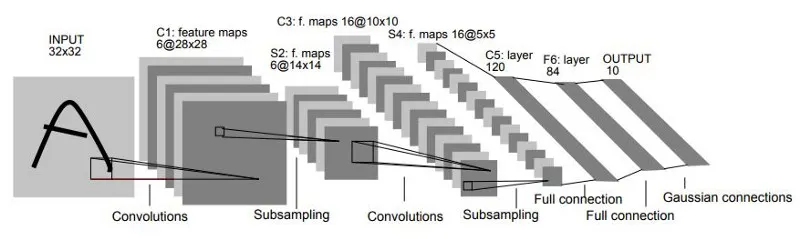

In [1]:
# Load the Dataset
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- **`mnist = tf.keras.datasets.mnist`** → Loads the MNIST dataset (handwritten digits 0–9).
- **`(x_train, y_train), (x_test, y_test) = mnist.load_data()`** → Splits into training and test sets:
    - `x_train`: 60,000 training images (28×28 pixels).
    - `y_train`: labels (0–9) for training images.
    - `x_test`: 10,000 test images.
    - `y_test`: labels for test images.

In [2]:
#  Pre-processing and Normalizing the Data
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1) 

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)

- **`rows, cols = 28, 28`** → Each MNIST image is 28×28 pixels.
- **Reshape** → Converts `x_train` and `x_test` into 4D arrays `(samples, 28, 28, 1)` so CNNs can use them (the `1` is for grayscale channel).
- **`input_shape = (28,28,1)`** → Defines input size for the model.
- **Convert to float & normalize** → Changes pixel values from `0–255` integers into `0–1` floats for faster and stable training.
- **One-hot encoding labels** → Converts labels (e.g., `7`) into vectors like `[0,0,0,0,0,0,0,1,0,0]` for classification.

👉 This makes the dataset ready for training in a CNN.

In [3]:
#  Define LeNet-5 Model
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

- **Sequential model** → Builds layers step by step.
- **C1: Conv2D (6 filters, 5×5 kernel, `tanh`)** → Detects local features (edges, curves) in the input.
- **S2: AveragePooling (2×2)** → Downsamples feature maps, reducing size while keeping important info.
- **C3: Conv2D (6 filters, 5×5, `tanh`)** → Extracts more complex patterns.
- **S4: AveragePooling (2×2)** → Further reduces dimensionality.
- **C5: Dense(120, `tanh`)** → Fully connected layer, learns high-level features.
- **Flatten** → Converts 2D features into a 1D vector for dense layers.
- **FC6: Dense(84, `tanh`)** → Another fully connected layer for richer representations.
- **Output layer: Dense(10, `softmax`)** → Produces class probabilities for 10 digit classes (0–9).

👉 This is the **classic LeNet-5 architecture** used for digit recognition (like MNIST).

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8953 - loss: 0.3531
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9603 - loss: 0.1357
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9730 - loss: 0.0904
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9786 - loss: 0.0708
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9815 - loss: 0.0605
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9850 - loss: 0.0505
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9867 - loss: 0.0451
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9882 - loss: 0.0402
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9893 - loss: 0.0360
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9896 - loss: 0.0335
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0463
Accuracy :  0.9847000241279602
Training Data (60000, 2

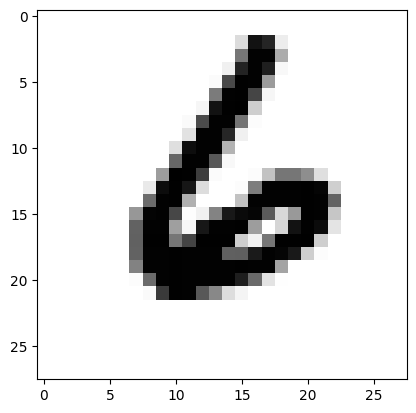

In [9]:
# Evaluate the Model and Visualize the process
lenet = build_lenet(input_shape)

# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
# Transform labels to one hot encoding
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
  y_test = tf.keras.utils.to_categorical(y_test, 10)

loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())

### 1️⃣ Build & Compile

- **`lenet = build_lenet(input_shape)`** → Creates the LeNet-5 model.
- **Compile** → Using `adam` optimizer and `categorical_crossentropy` loss for multi-class classification.

### 2️⃣ Train the Model

- **`lenet.fit()`** → Trains the model for 10 epochs with batch size 128.
- **`history`** → Stores training loss & accuracy for visualization.

### 3️⃣ Evaluate Performance

- **`lenet.evaluate(x_test, y_test)`** → Computes test loss and accuracy.
- Prints test **accuracy**.

### 4️⃣ Reshape Data for Visualization

- Converts `x_train` & `x_test` back to 28×28 images for plotting.

### 5️⃣ Visualize Sample Image

- **`plt.imshow()`** → Displays the image at `image_index` from test set.

### 6️⃣ Make a Prediction

- **`lenet.predict()`** → Predicts the class for the selected image.
- **`pred.argmax()`** → Outputs the digit with highest probability.

✅ This workflow lets you **train, evaluate, visualize, and predict** MNIST digits using LeNet-5.

---

### **1.2 AlexNet (2012)**

- **Purpose:** Deep CNN for **large-scale ImageNet classification**.
- #### **Innovations:**
    - ReLU activation → faster convergence.
    - Dropout → reduces overfitting.
    - GPU training → feasible for deep networks.
    - Data augmentation → improves generalization.

- #### **Architecture Details:**
    - 5 convolutional layers (with pooling layers interspersed)
    - 3 fully connected layers
    - Output: softmax over 1000 classes

- #### **Features:**

    - Deeper than LeNet (8 layers).
    - **ReLU activation** → faster training vs tanh/sigmoid.
    - **Dropout** → prevents overfitting.
    - **Data augmentation** → improves generalization.
    - First to use **GPU acceleration** for CNN training.

- #### **Workflow:**

    1. **Input:** 224×224×3 RGB image.
    2. **Conv1:** 96 filters, 11×11, stride 4 → outputs 55×55×96. Captures large receptive field features.
    3. **Max Pooling:** 3×3, stride 2 → reduces to 27×27×96.
    4. **Conv2:** 256 filters, 5×5 → outputs 27×27×256.
    5. **Max Pooling:** 3×3, stride 2 → reduces to 13×13×256.
    6. **Conv3:** 384 filters, 3×3 → outputs 13×13×384.
    7. **Conv4:** 384 filters, 3×3 → outputs 13×13×384.
    8. **Conv5:** 256 filters, 3×3 → outputs 13×13×256.
    9. **Max Pooling:** 3×3, stride 2 → reduces to 6×6×256.
    10. **Flatten:** 6×6×256 = 9216 features.
    11. **FC1:** 4096 neurons + ReLU + Dropout (0.5).
    12. **FC2:** 4096 neurons + ReLU + Dropout (0.5).
    13. **Output Layer (Softmax):** 1000 classes for ImageNet.

- #### **Advantages:**
    - First CNN to scale to **large images** and datasets.
    - ReLU accelerates training.
    - Dropout improves generalization.
- #### **Disadvantages:**
    - Very high computational cost.
    - Requires GPUs for training.
    - Large number of parameters (~60 million).
- **Why use:** Deep CNN for large-scale classification.
- **Best for:** ImageNet-level classification.

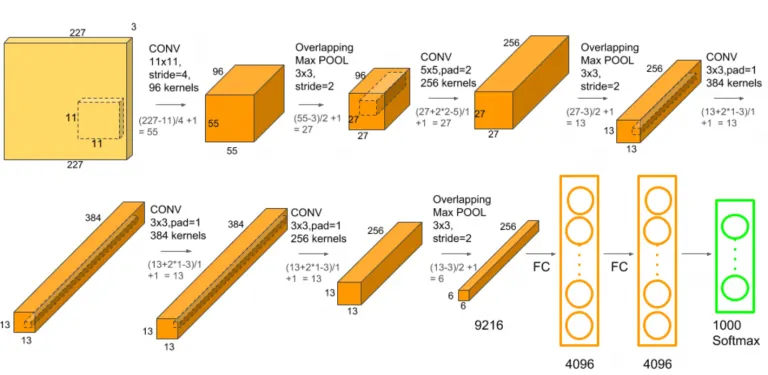

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.3644 - loss: 1.7778 - val_accuracy: 0.1830 - val_loss: 2.1505
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.4962 - loss: 1.3961 - val_accuracy: 0.2004 - val_loss: 2.1733
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.5511 - loss: 1.2479 - val_accuracy: 0.1705 - val_loss: 2.7413
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.5952 - loss: 1.1303 - val_accuracy: 0.2085 - val_loss: 2.4723
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.6297 - loss: 1.0447 - val_accuracy: 0.4069 - val_loss: 1.7861
✅ Test Accuracy: 0.4146
✅ Test Loss: 1.7476


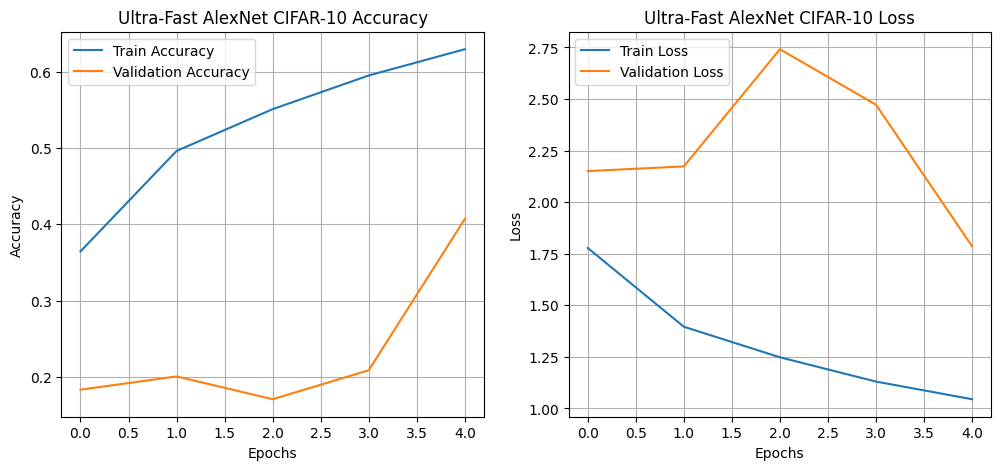

In [1]:
# Ultra-Fast AlexNet-Inspired CNN for CIFAR-10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# -----------------------------
# Load & Preprocess CIFAR-10 Dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -----------------------------
# Ultra-Fast AlexNet Model
# -----------------------------
def AlexNet_UltraFast(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # Conv Layer 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Conv Layer 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Conv Layer 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten
    model.add(Flatten())

    # Single Fully Connected Layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# -----------------------------
# Build, Compile, Train the Model
# -----------------------------
model = AlexNet_UltraFast()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=512,   # bigger batch = faster
                    epochs=5,         # only 5 epochs
                    validation_split=0.2,
                    verbose=1)

# -----------------------------
# Evaluate the Model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# -----------------------------
# Plot Training & Validation Results
# -----------------------------
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Ultra-Fast AlexNet CIFAR-10 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Ultra-Fast AlexNet CIFAR-10 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

- **Load & preprocess CIFAR-10** → Normalize pixels to 0–1 and one-hot encode labels.
- **Define model** → 3 convolutional layers (32→64→128 filters) with ReLU, MaxPooling, and BatchNorm; 1 fully connected layer with Dropout; softmax output for 10 classes.
- **Compile & train** → SGD optimizer, categorical cross-entropy loss, batch size 512, 5 epochs, 20% validation.
- **Evaluate** → Test accuracy and loss on unseen images.
- **Plot** → Training & validation accuracy/loss over epochs for visualization.

It’s a **lightweight, fast version of AlexNet** designed for quick training on CIFAR-10.

---

### **1.3 VGG (2014)**

- **Purpose:** Deep and uniform CNN using **3×3 convolutional filters**.
- **Key Points:**
    - Simplicity and depth
    - VGG-16: 13 conv layers + 3 FC layers
    - Max pooling after certain convolution blocks

- #### **Features:**
    
    - Very **deep** (16–19 layers).
    - **Uniform design:** only 3×3 conv filters + 2×2 pooling.
    - Large fully connected layers at the end.
    - High parameter count (~138M).

- #### **Workflow (VGG16):**

    1. **Input:** 224×224×3 image.
    2. **Block1:** 2× Conv (64 filters, 3×3) → Max Pool → 112×112×64.
    3. **Block2:** 2× Conv (128 filters, 3×3) → Max Pool → 56×56×128.
    4. **Block3:** 3× Conv (256 filters, 3×3) → Max Pool → 28×28×256.
    5. **Block4:** 3× Conv (512 filters, 3×3) → Max Pool → 14×14×512.
    6. **Block5:** 3× Conv (512 filters, 3×3) → Max Pool → 7×7×512.
    7. **Flatten:** 7×7×512 = 25088 features.
    8. **FC1:** 4096 neurons + ReLU.
    9. **FC2:** 4096 neurons + ReLU.
    10. **Output Layer (Softmax):** 1000 classes.
    
- #### **Advantages:**
    - Simplicity → easy to implement.
    - Deep enough to learn hierarchical features.
- #### **Disadvantages:**
    - Very high computational cost.
    - Large model size (138M parameters in VGG-16).
- **Why use:** Deep networks with uniform architecture.
- **Best for:** High-performance image classification when computational resources are available.

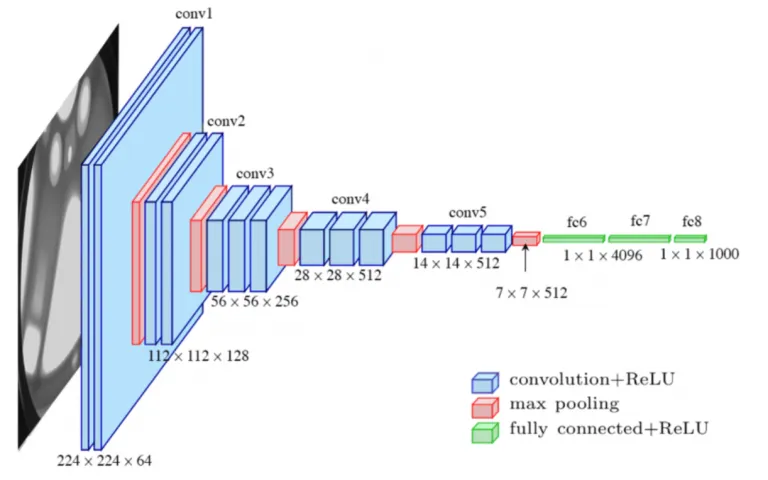

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_vgg16(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate the model
vgg16_model = build_vgg16()
vgg16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

### **1️⃣ Imports**

- `tensorflow` → For building the CNN.
- `layers, models` → To define layers (Conv2D, MaxPooling, Dense, Flatten) and the Sequential model.

---

### **2️⃣ Build VGG16 Model**

- **Sequential model** → Layers added one after another.

**Convolutional Blocks:**

- **Block 1:** 2× Conv2D(64 filters, 3×3) → MaxPooling2D(2×2)
- **Block 2:** 2× Conv2D(128) → MaxPooling2D(2×2)
- **Block 3:** 3× Conv2D(256) → MaxPooling2D(2×2)
- **Block 4:** 3× Conv2D(512) → MaxPooling2D(2×2)
- **Block 5:** 3× Conv2D(512) → MaxPooling2D(2×2)
- **Activation:** ReLU for all conv layers.
- **Padding:** `same` to keep spatial dimensions.

**Fully Connected Layers:**

- Flatten the 3D feature maps to 1D.
- Dense(4096) → ReLU
- Dense(4096) → ReLU
- Dense(num_classes) → Softmax (outputs class probabilities).

---

### **3️⃣ Instantiate & Summarize**

- `vgg16_model = build_vgg16()` → Creates the VGG16 network.
- `vgg16_model.summary()` → Prints model architecture, layers, output shapes, and number of parameters.

---

### ✅ **Purpose**

- VGG16 is a **deep CNN with 16 layers** used for **image classification**.
- Its **uniform architecture** (3×3 convs, 2×2 max-pooling) makes it simple yet powerful.

---

### **1.4 GoogLeNet / Inception (2014)**

- **Purpose:** Multi-scale feature extraction efficiently.
- **Innovations:**
    - **Inception module**: parallel 1×1, 3×3, 5×5 conv + pooling
    - **Global average pooling** instead of FC layers
    - **Auxiliary classifiers** to improve gradient flow

- #### **Features:**
    - Introduced **Inception Module**.
    - Parallel conv layers with different filter sizes (1×1, 3×3, 5×5).
    - **1×1 convolutions** used for **dimensionality reduction**.
    - **Global average pooling** replaces large FC layers.
    - Much fewer parameters (~4M vs VGG’s 138M).
  
- #### **Workflow:**

    1. **Input:** 224×224×3 image.
    2. **Initial Conv + Pooling:** Reduce spatial size.
    3. **Inception Modules:** Each module does in parallel:
        - 1×1 conv (dimension reduction).
        - 3×3 conv (mid-level features).
        - 5×5 conv (large patterns).
        - 3×3 max pooling.
            
            → Concatenate outputs depth-wise.
        
4. **Stack Multiple Inception Modules:** Hierarchical feature extraction.
5. **Global Average Pooling:** Reduces feature maps to 1×1×N.
6. **Fully Connected Layer:** Small dense layer.
7. **Output (Softmax):** 1000 ImageNet classes.
   
- #### **Advantages:**
    - Efficient → fewer parameters than VGG.
    - Multi-scale feature extraction → captures local and global patterns.
- #### **Disadvantages:**
    - Complex architecture → harder to implement.
    - Difficult to modify for new tasks.
- **Why use:** Large-scale image classification with efficiency.
- **Best for:** When you need **high accuracy with fewer parameters**.

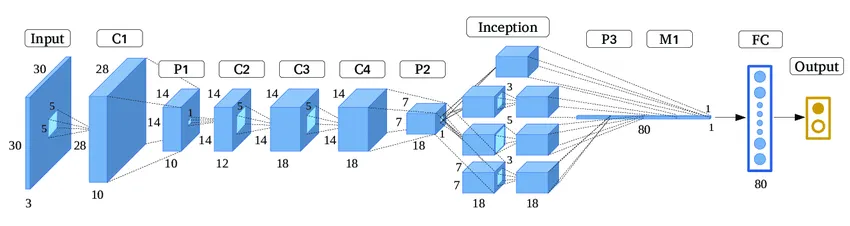

In [13]:
import torch
import torch.nn as nn

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_pool):
        super(InceptionModule, self).__init__()

        # 1x1 convolution branch
        self.branch1x1 = nn.Conv2d(in_channels, out_1x1, kernel_size=1)

        # 1x1 convolution followed by 3x3 convolution branch
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(in_channels, red_3x3, kernel_size=1),
            nn.Conv2d(red_3x3, out_3x3, kernel_size=3, padding=1)
        )

        # 1x1 convolution followed by 5x5 convolution branch
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(in_channels, red_5x5, kernel_size=1),
            nn.Conv2d(red_5x5, out_5x5, kernel_size=5, padding=2)
        )

        # Max pooling followed by 1x1 convolution branch
        self.branch_pool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_pool, kernel_size=1)
        )

    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        branch3x3 = self.branch3x3(x)
        branch5x5 = self.branch5x5(x)
        branch_pool = self.branch_pool(x)

        # Concatenate the outputs along the channel dimension
        return torch.cat([branch1x1, branch3x3, branch5x5, branch_pool], 1)

# Example usage of the InceptionModule
if __name__ == '__main__':
    # Input tensor (batch_size, channels, height, width)
    input_tensor = torch.randn(1, 3, 224, 224)

    # Create an Inception module instance
    # Parameters: in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_pool
    inception_block = InceptionModule(3, 64, 96, 128, 16, 32, 32)

    # Pass the input through the Inception module
    output_tensor = inception_block(input_tensor)

    print(f"Input shape: {input_tensor.shape}")
    print(f"Output shape: {output_tensor.shape}")

Input shape: torch.Size([1, 3, 224, 224])
Output shape: torch.Size([1, 256, 224, 224])


### **1️⃣ Imports**

- `torch` & `torch.nn` → For building PyTorch neural network modules.

---

### **2️⃣ InceptionModule Class**

- **Purpose:** Implements an **Inception block** from GoogLeNet, which captures features at multiple scales (1×1, 3×3, 5×5 convolutions and pooling) in parallel.

**Branches inside the module:**

1. **1×1 convolution** → Direct feature extraction.
2. **1×1 → 3×3 convolution** → Reduces channels first (dimensionality reduction) then extracts medium-scale features.
3. **1×1 → 5×5 convolution** → Reduces channels then extracts larger-scale features.
4. **3×3 MaxPool → 1×1 convolution** → Preserves spatial info, adds robustness.

**Forward Pass:**

- Each branch processes input independently.
- Outputs are **concatenated along the channel dimension** to form a rich feature map.

---

### **3️⃣ Example Usage**

- Input: `(batch_size=1, channels=3, height=224, width=224)`
- Inception block instance: `InceptionModule(3, 64, 96, 128, 16, 32, 32)`
- Output: Concatenated feature maps from all 4 branches.

**Shapes:**

- Input shape → `(1, 3, 224, 224)`
- Output shape → `(1, total_channels, 224, 224)`
    - `total_channels = 64 + 128 + 32 + 32 = 256`

---

### ✅ **Purpose & Advantage**

- **Multi-scale feature extraction** in a single block.
- **Efficient**: reduces computation using 1×1 convolutions before expensive convolutions.
- Used as the building block in **GoogLeNet / Inception networks**.

---

### **1.5 ResNet (2015)**

- **Purpose:** Train **very deep networks** using residual connections.
- **Key Idea:** Skip connections solve **vanishing gradient problem**.

- #### **Features:**

- Introduced **Residual Blocks**.
- Skip connections: output = F(x) + x.
- Can train **very deep networks** (50–152 layers).
- Solves vanishing gradient problem.
  
- #### **Workflow (ResNet-50):**

1. **Input:** 224×224×3 image.
2. **Conv1:** 7×7 conv + max pooling.
3. **Residual Blocks (4 stages):**
    - Each block has Conv → BatchNorm → ReLU → Conv → BN.
    - Skip connection: Add input directly to output.
    - ReLU applied.
    - Example: Stage1 (3 blocks), Stage2 (4 blocks), Stage3 (6 blocks), Stage4 (3 blocks).
4. **Global Average Pooling.**
5. **Fully Connected Layer.**
6. **Softmax Output (1000 classes).**
   
- #### **Advantages:**
    - Enables **very deep networks** (50–152 layers).
    - Skip connections solve vanishing gradient problem.
- #### **Disadvantages:**
    - More complex architecture.
    - May overfit smaller datasets if not regularized.
- **Why use:** Very deep CNNs for large-scale image recognition.
- **Best for:** ImageNet, large-scale classification, deep feature extraction.

- **Variants:** ResNet-50, ResNet-101, ResNet-152

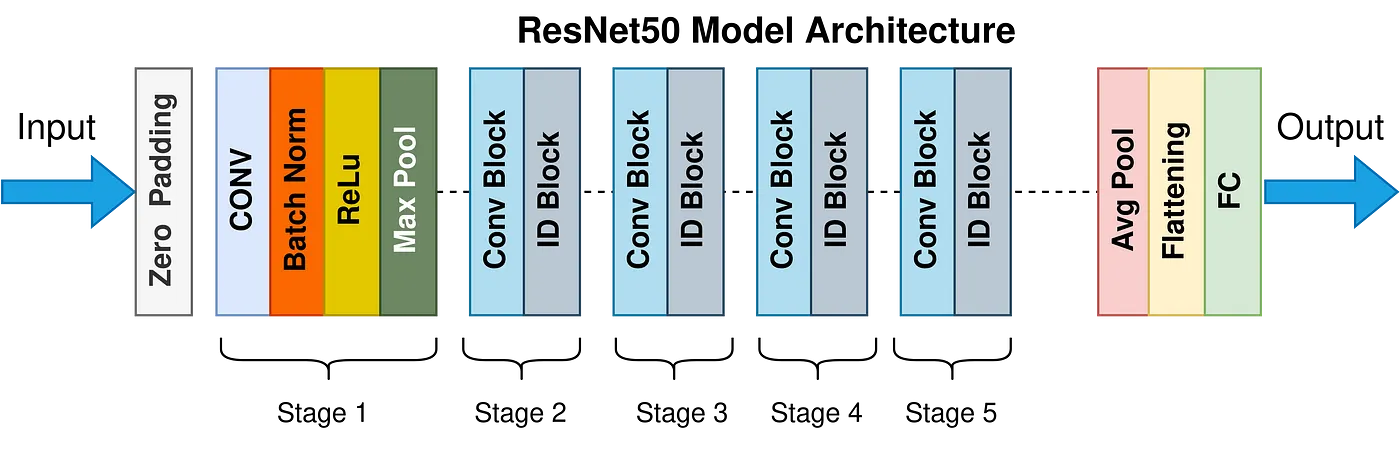

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # First conv layer
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        # Second conv layer
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut (identity or 1x1 conv if dimensions change)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion*out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion*out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)  # Residual connection
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Initial conv layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Residual layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        
        # Pooling + Fully connected layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for s in strides:
            layers.append(block(self.in_channels, out_channels, s))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Example usage
model = ResNet18()
x = torch.randn(1, 3, 32, 32)  # Example input (like CIFAR-10)
y = model(x)
print("Input shape:", x.shape)
print("Output shape:", y.shape)  # Should be (1,10)

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 10])


### **1️⃣ BasicBlock Class**

- Implements a **residual block**, the building unit of ResNet.
- **Structure:**
    1. Two 3×3 convolutional layers with batch normalization.
    2. **Shortcut connection**:
        - If input and output dimensions match → identity mapping.
        - If dimensions differ (stride >1 or channel mismatch) → 1×1 convolution.
- **Forward pass:**
    - Input → conv1 → BN → ReLU → conv2 → BN
    - Add shortcut (residual connection)
    - Apply ReLU → output

**Purpose:** Allows **gradients to flow directly**, solving vanishing gradient problem in deep networks.

---

### **2️⃣ ResNet Class**

- Builds the **whole ResNet architecture** using `BasicBlock`.
- **Components:**
    1. Initial 3×3 conv + BN + ReLU
    2. Four residual layers (`layer1` to `layer4`) with different channel sizes: 64 → 128 → 256 → 512
    3. Adaptive average pooling → Flattens feature maps
    4. Fully connected layer → outputs `num_classes` predictions
- `_make_layer` function:
    - Repeats `BasicBlock` `num_blocks` times per layer
    - Handles stride for downsampling in the first block of each layer

---

### **3️⃣ ResNet18 Function**

- Defines **ResNet-18**, using `BasicBlock` with `[2,2,2,2]` blocks per layer.
- Output channels grow progressively as features get deeper.

---

### **4️⃣ Example Usage**

- Input: `(1, 3, 32, 32)` → CIFAR-10 image (batch_size=1, RGB channels)
- Output: `(1, 10)` → 10-class classification
- Residual connections allow deep feature learning without degradation.

---

### **✅ Advantages**

- Very **deep networks** possible without vanishing gradients.
- Residual learning → faster convergence.
- Better accuracy on large datasets like ImageNet.

---

### **1.6 DenseNet (2017)**

- **Purpose:** **Feature reuse** through dense connections.
- **Key Idea:** Each layer receives input from **all previous layers**.
- **Advantages:** 

- #### **Features:**

- Each layer connects to **all previous layers**.
- Feature reuse → very efficient learning.
- Fewer parameters than ResNet, but high memory usage.
  
- #### **Workflow (DenseNet-121):**

1. **Input:** 224×224×3 image.
2. **Initial Conv Layer.**
3. **Dense Block 1:** Each new layer receives input from all previous layers (concatenation).
4. **Transition Layer:** 1×1 conv + pooling (reduces size).
5. **Dense Block 2, Transition, Dense Block 3, Transition, Dense Block 4.**
6. **Global Average Pooling.**
7. **Fully Connected Layer.**
8. **Softmax Output.**
   
- #### **Advantages:**
    - Improves gradient flow.
    - Reduces parameters compared to ResNet.
    - Efficient gradient flow, fewer parameters, reduced overfitting.
- #### **Disadvantages:**
    - Dense connectivity increases memory usage.
    - Harder to implement from scratch.
- **Why use:** Deep CNNs with efficient parameter usage.
- **Best for:** Image classification, object detection, transfer learning.

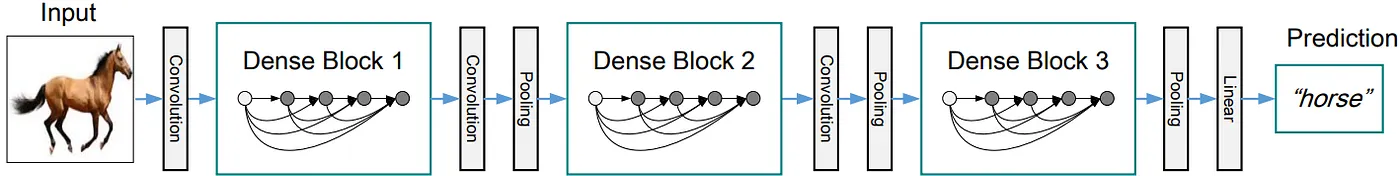

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        # Bottleneck 1x1 conv
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, stride=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        out = self.conv2(self.relu(self.bn2(out)))
        # Concatenate input and output (dense connectivity)
        return torch.cat([x, out], dim=1)


class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = self.avg_pool(out)
        return out


class DenseNet121(nn.Module):
    def __init__(self, growth_rate=32, block_layers=(6, 12, 24, 16), num_classes=1000):
        super().__init__()
        # Initial convolution + pooling
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.features = nn.Sequential()
        num_channels = 64

        # Build dense blocks and transition layers
        for i, num_layers in enumerate(block_layers):
            # Dense Block
            block = nn.Sequential()
            for j in range(num_layers):
                layer = DenseLayer(num_channels, growth_rate)
                block.add_module(f"denseblock_{i+1}_layer_{j+1}", layer)
                num_channels += growth_rate
            self.features.add_module(f"denseblock_{i+1}", block)

            # Transition layer (except after last block)
            if i != len(block_layers) - 1:
                out_channels = num_channels // 2
                trans = TransitionLayer(num_channels, out_channels)
                self.features.add_module(f"transition_{i+1}", trans)
                num_channels = out_channels

        # Final batch norm
        self.bn_final = nn.BatchNorm2d(num_channels)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(num_channels, num_classes)

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.maxpool(out)
        out = self.features(out)
        out = self.relu(self.bn_final(out))
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)


# ✅ Example usage
if __name__ == "__main__":
    model = DenseNet121(num_classes=1000)
    x = torch.randn(1, 3, 224, 224)  # sample input image
    y = model(x)
    print("Output shape:", y.shape)  # should be [1, 1000]

Output shape: torch.Size([1, 1000])


### **1️⃣ DenseLayer**

- Implements a **single layer inside a dense block**.
- **Structure:**
    1. BatchNorm → ReLU → 1×1 convolution (**bottleneck layer**)
    2. BatchNorm → ReLU → 3×3 convolution
- **Dense connectivity:** Concatenates input `x` with output feature maps → `[x, out]`
- **Purpose:** Each layer can directly access outputs from all previous layers, which **improves gradient flow and feature reuse**.

---

### **2️⃣ TransitionLayer**

- Reduces the **number of channels** and performs **downsampling**.
- **Structure:**
    1. BatchNorm → ReLU → 1×1 convolution → **compress channels**
    2. 2×2 Average Pooling → **reduce spatial dimensions**
- **Purpose:** Keeps the network efficient and avoids too many feature maps.

---

### **3️⃣ DenseNet121**

- **Overall Architecture:**
    1. Initial Conv: 7×7 conv → BN → ReLU → MaxPool
    2. **Dense Blocks:** four dense blocks with `block_layers=(6,12,24,16)` layers
        - Each layer concatenates features from all previous layers
    3. **Transition Layers:** placed between dense blocks (except after the last)
    4. Final BatchNorm → ReLU → AdaptiveAvgPool → Flatten → Fully Connected Layer
- **Growth rate:** Controls how many new feature maps each layer produces (`growth_rate=32` by default).

---

### **4️⃣ Forward Pass**

1. Input → initial conv + BN + ReLU + MaxPool
2. Pass through `features` (dense blocks + transition layers)
3. Apply final BN + ReLU
4. AdaptiveAvgPool → Flatten
5. Fully connected → Class scores

---

### **5️⃣ Example Usage**

- Input: `(1, 3, 224, 224)` → RGB image
- Output: `(1, 1000)` → 1000-class predictions (ImageNet)

---

### **✅ Advantages**

- **Feature reuse:** Dense connectivity reduces redundancy.
- **Efficient gradients:** Easier training of very deep networks.
- **Fewer parameters:** Despite depth, DenseNet is memory-efficient.

### **❌ Disadvantages**

- Memory can grow due to concatenation of all previous layers.
- Computationally heavier than standard ResNet for large inputs.

---

## **2. Modern CNN Variants**

### **2.1 EfficientNet (2019)**

- **Purpose:** Optimize accuracy while reducing computation.
- **Key Concept:** **Compound scaling**: simultaneously scales depth, width, and resolution.

- #### **Features:**
    - Introduces **compound scaling**:
        - Depth (layers).
        - Width (filters).
        - Resolution (input size).
    - Very high accuracy with fewer parameters.
  
- #### **Workflow:**
    1. **Input:** 224×224×3 image.
    2. **Stem Conv:** 3×3 conv + BN + Swish activation.
    3. **MBConv Blocks (Mobile Inverted Bottleneck Convs):**
        - Expand channels.
        - Depthwise conv.
        - Squeeze-and-Excitation (attention).
        - Project back to fewer channels.
    4. **Stage Repeats:** Several MBConv blocks with increasing depth & filters.
    5. **Global Average Pooling.**
    6. **Dropout.**
    7. **Fully Connected Layer.**
    8. **Softmax Output.**
- #### **Advantages:**
    - High accuracy with fewer parameters.
    - Flexible scaling for resources.
- #### **Disadvantages:**
    - Slightly complex to implement.
- **Why use:** High-performance, efficient CNN for production.
- **Best for:** Resource-constrained environments with high accuracy requirement.

---

### **2.2 MobileNet**

- **Purpose:** Lightweight CNN for mobile/edge devices.
- **Key Concept:** Depthwise separable convolution reduces computation.

- #### **Features:**

    - Designed for **mobile and edge devices**.
    - Uses **depthwise separable convolutions** (depthwise conv + 1×1 pointwise conv).
    - Very lightweight with fewer parameters.
  
- #### **Workflow (EfficientNet-B0):**
    - **Input:** 224×224×3 image.
    - **Depthwise Convolution:** Each channel convolved separately.
    - **Pointwise Convolution (1×1):** Combines outputs across channels.
    - **Repeat Depthwise + Pointwise Convs:** Across multiple layers with strides for downsampling.
    - **Global Average Pooling.**
    - **Fully Connected Layer.**
    - **Softmax Output.**
    
- #### **Advantages:**
    - Very small model size.
    - Fast inference.
- #### **Disadvantages:**
    - Slightly lower accuracy than full CNNs.
- **Why use:** Deploy CNNs on **mobile or embedded devices**.
- **Best for:** Real-time mobile applications.

---

### **2.3 ShuffleNet**

- **Purpose:** Ultra-efficient network for edge devices.
- **Key Concept:** Group convolution + channel shuffle for efficiency.

- #### **Features:**
    - Designed for **extreme efficiency**.
    - Uses:
        - **Grouped convolutions** (split channels into groups).
        - **Channel shuffle** to mix information between groups.
    - Low computation, suitable for embedded systems.
  
- #### **Workflow:**

    1. **Input:** 224×224×3 image.
    2. **Grouped Convolutions:** Divide channels into groups to reduce computation.
    3. **Channel Shuffle:** Rearranges channel groups to mix information.
    4. **Depthwise Convolutions:** Lightweight feature extraction.
    5. **Stack of ShuffleNet Units.**
    6. **Global Average Pooling.**
    7. **Fully Connected Layer.**
    8. **Softmax Output.**
   
- #### **Advantages:**
    - Extremely low computational cost.
    - Suitable for embedded devices.
- #### **Disadvantages:**
    - Slightly lower accuracy.
    - Limited depth and feature learning.
- **Why use:** When **speed and efficiency** are more important than top accuracy.

---

## **3. Summary Table**

| Model | Year | Key Feature | Purpose | Advantages | Disadvantages | Best Use |
| --- | --- | --- | --- | --- | --- | --- |
| LeNet-5 | 1998 | Conv + Pool + FC | Digit recognition | Simple, easy | Low capacity | MNIST |
| AlexNet | 2012 | ReLU, Dropout, GPU | Large-scale images | Deep, accurate | Heavy, GPU needed | ImageNet |
| VGG | 2014 | 3×3 Conv stack | High accuracy | Simple, deep | Very heavy | Large images |
| GoogLeNet | 2014 | Inception module | Efficient multi-scale | Fewer params | Complex | Large datasets |
| ResNet | 2015 | Skip connections | Very deep nets | Solves vanishing gradient | Complex | Deep feature extraction |
| DenseNet | 2017 | Dense connections | Efficient deep nets | Feature reuse, fewer params | Memory-heavy | Classification, transfer learning |
| EfficientNet | 2019 | Compound scaling | Efficient & accurate | High accuracy, small | Complex | Scalable CNNs |
| MobileNet | 2017 | Depthwise separable | Mobile CNN | Lightweight | Slightly less accurate | Mobile apps |
| ShuffleNet | 2018 | Group conv + shuffle | Ultra-efficient | Extremely fast | Lower accuracy | Embedded devices |

### ✅ Key Takeaways

1. CNNs evolved from **simple small networks (LeNet-5)** → **very deep & efficient modern networks (EfficientNet, MobileNet)**.
2. Core concepts include **convolution, pooling, skip connections, dense connections**, and **multi-scale feature extraction**.
3. Modern focus:
    - Accuracy with efficiency (EfficientNet)
    - Lightweight real-time deployment (MobileNet, ShuffleNet)
    - Feature reuse and gradient flow (DenseNet)